# Descriptive statistics

`Descriptive statistics helps to simplify large amounts of data in a sensible way by quantitatively describing the data in a manageable from.`

#### This notebook will explain and implement the following concepts related to descriptive statistics:
- [Measures of center](#averages)
- [Spread of the values](#spread)
- [5 Number Summary](#summary)
- [Boxplot](#boxplot)
- [Frequency](#frequency)
- [Measurement of skewness and kurtosis](#skew)
- [Exploration of relationships](#corr)

In [1]:
# make relevant imports
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# crate the relevant data to use
arr1 = np.arange(10, 20)
arr2 = np.array([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])

df = pd.read_csv('data/datasets-26073-33239-weight-height.csv')

In [3]:
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


<a id='averages'></a>
### Measures of center
- mean (the sum of the values divided by the number of values)
    - mean is influenced by outliers
- median (the middle number of all values)
    - robust to outliers
- mode (value that occurs most often)

In [38]:
# mean
mean = arr.mean()
# median
median = np.median(arr1)
# mode
mode = stats.mode(arr1)

print(f'Mean: {mean}')
print(f'Median: {median}')
print(f'Mode: {mode}')

Mean: 15.0
Median: 14.5
Mode: ModeResult(mode=array([10]), count=array([1]))


In [90]:
# use it on a dataframe 
# toy data!!!
print(f"Average height of males: {df[df['Gender'] == 'Male']['Height'].mean()}")
print(f"Average height of females: {df[df['Gender'] == 'Female']['Height'].mean()}")

Average height of males: 69.02634590621737
Average height of females: 63.708773603424916


<a id='spread'></a>
### Spread of the values
> the spread of the values can be measured with the range, variance, standard deviation, mean absolute deviation


#### Range
- the range of the values from min to max

In [95]:
np.ptp(arr1) 

9

In [105]:
np.ptp(arr2)

95

#### Variance
- measures the variation of a single variable (e.g. height of a person)
- squared deviation from the mean
- not in the same unit as the mean
- low value: data is clustered around the average and therefore not spread apart widely
- high value: data is much more spread from the average 

In [39]:
# this will lead to a low variance value
np.var(arr1)

8.25

In [40]:
# this will lead to a high variance value
np.var(arr2)

792.6899999999999

#### Standard deviation
- like variance, measures the deviation from the mean
- square root of the variance
- in the same unit as the mean -> more interpretability 
- low value: data is closely related to the average
- high value: large variance between the average and the data

In [41]:
np.std(arr1)

2.8722813232690143

In [42]:
np.std(arr2)

28.154750931237164

#### Mean Absolute Deviation
- computes the mean over the absolute deviations from the mean
- the same can be done with the medium to make to more robust against outliers

In [103]:
np.mean(np.absolute(arr1 - np.mean(arr1))) 

2.5

In [104]:
np.mean(np.absolute(arr2 - np.mean(arr2))) 

20.66

<a id='summary'></a>
### 5 Number Summary
> a convenient way to combine 5 descriptive methods to one to get a good overview over the values. It combines the minimum, first quartile, medium, third quartile and the maximum

In [111]:
# calculate quartiles
quartiles = np.percentile(arr2, [25, 50, 75])
# calculate min/max
arr2_min, arr2_max = arr2.min(), arr2.max()
# print 5-number summary
print('Min: %.2f' % arr2_min)
print('Q1: %.2f' % quartiles[0])
print('Median: %.2f' % quartiles[1])
print('Q3: %.2f' % quartiles[2])
print('Max: %.2f' % arr2_max)

Min: 1.00
Q1: 4.25
Median: 10.00
Q3: 23.25
Max: 96.00


<a id='boxplot'></a>
### Boxplot
> a standardized way of displaying the distribution of data based on the five number summary

- are there outliers?
- is data symmetrical?
- how tightly the data is grouped?
- is data skewed?

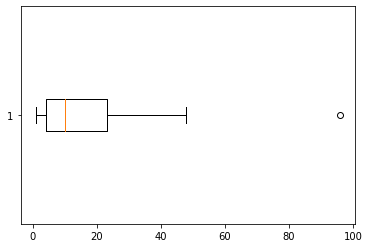

In [12]:
plt.boxplot(arr2, vert=False);

> when outliers are present in the data min and max values are not the same, that is because a boxplot calculated the min and max values and deems the ones that are higher or lower than the range as outliers. The following function is used:
- minimum: Q3 + 1.5*IQR
- maximum: Q1 - 1.5*IQR

IQR is the interquartile range (the box of the boxplot): from the 25th to the 75th percentile 

<a id='frequency'></a>
### Frequency
> how often each value appears in the dataset

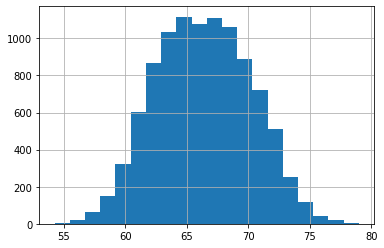

In [93]:
df['Height'].hist(bins=20)

<a id='skew'></a>
### Measurement of skewness ans kurtosis

#### Skewness
> not every distribution is symmetric, like the one above. The measure of how asymmetric a distribution is is called skewness.
##### Interpretation
- If skewness is less than -1 or greater than +1, the distribution is <b>highly skewed</b>.
- If skewness is between -1 and -0.5 or between +0.5 and +1, the distribution is <b>moderately skewed</b>.
- If skewness is between -0.5 and +0.5, the distribution is <b>approximately symmetric</b>.

#### Kurtosis
> Kurtosis is the measure of the thickness or heaviness of the tails of the distribution.
##### Interpretation
- A normal distribution has kurtosis exactly 3 (excess kurtosis exactly 0). Any distribution with kurtosis ≈3 (excess ≈0) is called <b>mesokurtic</b>.
- A distribution with kurtosis <3 (excess kurtosis <0) is called <b>platykurtic</b>. Compared to a normal distribution, its tails are shorter and thinner, and often its central peak is lower and broader.
- A distribution with kurtosis >3 (excess kurtosis >0) is called <b>leptokurtic</b>. Compared to a normal distribution, its tails are longer and fatter, and often its central peak is higher and sharper.

In [112]:
# calculate skewness
stats.skew(df['Height'])

0.049361683704905374

In [114]:
# calulate kurtosis
stats.kurtosis(df['Height'])

-0.4744964699248544

seems like we have a platykurtic distribution which is approximately symmetric

<a id='corr'></a>
### Exploration of relationships
> to measure relationships between variables one can use covariance and correlations

#### Covariance
- a measure of the level to which tow variables vary together (e.g.: height and weight of a person)
- important building block for many methods in pattern recognition and advanced statistics
    - PCA, SVD, Bays classifier

In [100]:
cov_data = np.array([arr1, arr2])

np.cov(cov_data)

array([[  9.16666667,  68.16666667],
       [ 68.16666667, 880.76666667]])

In [101]:
# use it on a pandas DataFrame
df[['Height', 'Weight']].cov()

,Height,Weight
Height,14.803473,114.242656
Weight,114.242656,1030.951855


<a id='correlation'></a>
#### Correlation
- measures the relationship between two or more variables (features)
- can take a value between -1 and 1
- correlation does not indicate causation 

there are different ways to calculate the correlation between variables:
- Linear
    - Person's r
- Rank
    - Spearman's rho
    - Kendall's tau 

##### Person's r
- measures the linear correlation
- covariance of the variables divided by the product of their standard deviation
- possible scores from -1 to 1

In [44]:
r = np.corrcoef(arr1, arr2)

In [45]:
# correlation matrix with the correlation coefficients
r

array([[1.        , 0.75864029],
       [0.75864029, 1.        ]])

In [72]:
# make a 2-d array
r_m = np.array([arr1, arr2])

In [76]:
# corrcoef considers ros as featurs and columns as observation, if the opposite behavior is present in the data
# set rowvar to False
np.corrcoef(r_m.T, rowvar=False)

array([[1.        , 0.75864029],
       [0.75864029, 1.        ]])

In [61]:
# use SciPy
# use [0], since SciPy returns the correlation coeff and the p-value in a tuple
stats.pearsonr(arr1, arr2)[0]

0.7586402890911869

In [52]:
# use it on a pandas DataFrame
df[['Height', 'Weight']].corr()

,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


#### Rank Correlation
- uses the ranks or the orderings of the data


##### Spearman's rho
- a nonparametric measure of rank correlation 
- uses monotonic correlations (can be linear or not)
- scores from -1 to 1:
    - 1: lager x values always correspond to larger y values
    - (-1): smaller x values always correspond to lager y values

In [56]:
stats.spearmanr(arr1, arr2)[0]

0.9757575757575757

In [62]:
df[['Height', 'Weight']].corr(method='spearman')

,Height,Weight
Height,1.000000,0.925708
Weight,0.925708,1.000000


##### Kendall's tau
- ordinal associations between two measures 

In [57]:
stats.kendalltau(arr1, arr2)[0]

0.911111111111111

In [77]:
corr_m = df[['Height', 'Weight']].corr(method='kendall')

In [80]:
corr_m

,Height,Weight
Height,1.00000,0.75909
Weight,0.75909,1.00000


In [79]:
# access the values with .iat[] or .at[]
corr_m.iat[0,1]

0.7590901890189019

### Resources
- https://www.kaggle.com/mustafaali96/weight-height?select=weight-height.csv
- https://realpython.com/numpy-scipy-pandas-correlation-python/
- https://www.pythonfordatascience.org/variance-covariance-correlation/
- https://www.geeksforgeeks.org/absolute-deviation-and-absolute-mean-deviation-using-numpy-python/
- https://www.thoughtco.com/differences-in-descriptive-and-inferential-statistics-3126224
- https://machinelearningmastery.com/how-to-calculate-the-5-number-summary-for-your-data-in-python/
- https://www.thoughtco.com/what-is-skewness-in-statistics-3126242
- https://www.thoughtco.com/what-is-kurtosis-3126241
- https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51